## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>4 |</span></span></b> Modelling</b></p></div>

**We have divided our analysis into two distinct tasks: `binary` and `multiclass` classification.**

**In the `binary classification` task, our model will focus on accurately predicting whether a tweet's sentiment is either "Positive" or "Negative."**

**Once this `binary classification` is established, we will expand our analysis to incorporate the "Neutral" sentiment category. This will create a three-way classification system.**

**Both `binary and multiclass` classification offer valuable insights and have diverse potential applications.**

In [1]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting statistical graphs
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import squarify
from collections import Counter

# Load the Text Cleaning Package
import neattext.functions as nfx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm ##new progress bars repeatedly
import os
import nltk ##building Python programs to work with human language data
#import spacy #for training the NER model tokenize words
#import random
#from spacy.util import compounding
#from spacy.util import minibatch


pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'D:\Natural Language Processing\Phase 4 Project\data\processed_data.csv')

df.head()

,clean_tweet,preprocessed_tweet,lemma_preprocessed_tweet,stemma_preprocessed_tweet,sentiment
0,despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th,despot uhuru kenyattas olympian performance drinking looting dens funeral committees fallen thieves tribalists dictators 10 year legacy kenyans remember punish dubious legacy august 9th,despot uhuru kenyattas olympian performance drinking looting den funeral committee fallen thief tribalists dictator 10 year legacy kenyan remember punish dubious legacy august 9th,despot uhuru kenyatta olympian perform drink loot den funer committe fallen thiev tribalist dictat 10 year legaci kenyan rememb punish dubiou legaci august 9th,Neutral
1,president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like,president lawyer agree issues best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warriors like,president lawyer agree issue best mp westlands tim wanyonyi good man coward legislated parliament parliament deserves eloquent brilliant warrior like,presid lawyer agre issu best mp westland tim wanyonyi good man coward legisl parliament parliament deserv eloqu brilliant warrior like,Positive
2,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion 9 years argument implies ruto trillionaire broke genuinely mourning,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion years argument implies ruto trillionaire broke genuinely mourning,alleged ruto stolen uhuru kenyatta disclose uhuru kenyatta stolen stashed sh 25 trillion year argument implies ruto trillionaire broke genuinely mourning,alleg ruto stolen uhuru kenyatta disclos uhuru kenyatta stolen stash sh 25 trillion year argument impli ruto trillionair broke genuin mourn,Positive
3,credible evidence timestamped image inside vehicle,credible evidence timestamped image inside vehicle,credible evidence timestamped image inside vehicle,credibl evid timestamp imag insid vehicl,Positive
4,tweet white people homeless,tweet white people homeless,tweet white people homeless,tweet white peopl homeless,Neutral


## <b>4.1 <span style='color:#F1A424'>|</span> Binary Classification</b>

**Because we are going to be developing a model for binary classification, we need to remove neutral emotions from our tweets and binarize our target column which is the 'Emotion' column.**

### <b>4.1.1 <span style='color:#F1A424'>|</span> Train Test Split</b>

In [3]:
# import train test split
from sklearn.model_selection import train_test_split

#removing neutral tweets for binary classification
df_binary = df[df['sentiment'] != 'Neutral']

#binarizing sentiment column
emotion_dict = {'Negative': 0, 'Positive': 1}
df_binary['sentiment'] = df_binary['sentiment'].map(emotion_dict)

X_train, X_test, y_train, y_test = train_test_split(df_binary['lemma_preprocessed_tweet'],
                                                    df_binary['sentiment'],
                                                    test_size=0.2,
                                                    random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10243,), (2561,), (10243,), (2561,))

In [4]:
# from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix, roc_curve
# from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def classification(y_true, y_pred, X_test, X_train, clf):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality.
    -----------------------------------
    Arguments:
    y_true: Correct y values, typically y_test that comes from the 
    train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X_test: X_test values from train_test_split
    X_train: X_train values from train_test_split"""
    
    #training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    #Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    #Plotting the normalized confusion matrix
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)/len(y_true)).plot(ax=ax[0], cmap="cividis")
    ax[0].set_title("Confusion Matrix")
    ax[0].grid(False)
    


    
    #Plotting the ROC curve
    RocCurveDisplay.from_estimator(clf, X_test, y_true, ax=ax[1])
    ax[1].set_title("ROC Curve")
    ax[1].grid(False)
    ax[1].plot([0,1], [0,1], ls='--', color='orange')
    ax[1].set_xlim([0,1])
    ax[1].set_ylim([0,1])
    ax[1].set_ylabel("True Positive Rate")
    ax[1].set_xlabel("False Positive Rate")
    plt.tight_layout()
    
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')


### <b>4.1.2 <span style='color:#F1A424'>|</span> Baseline Model & Feature Extraction</b>

- **In order to be able to evaluate our model performances and truly assess how well they are performing compared to random guessing, we will build a dummy classifier as our baseline.**
- **Before diving into hyperparameter tuning, take a step back to establish a baseline for your model's performance. Capture its current metrics before optimizing any settings. This crucial step allows you to clearly assess and demonstrate any improvements resulting from your tuning efforts. Establishing a baseline also strengthens stakeholder engagement and supports your narrative when explaining your methodology.**
- **We will convert text from text to vector using **TF-IDF** vectorizer. **TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. It is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.**

### <b>4.1.3 <span style='color:#F1A424'>|</span> Vanilla Dummy Model</b>

Training Score: 0.51             Test Score:0.51


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1262
           1       0.51      1.00      0.67      1299

    accuracy                           0.51      2561
   macro avg       0.25      0.50      0.34      2561
weighted avg       0.26      0.51      0.34      2561



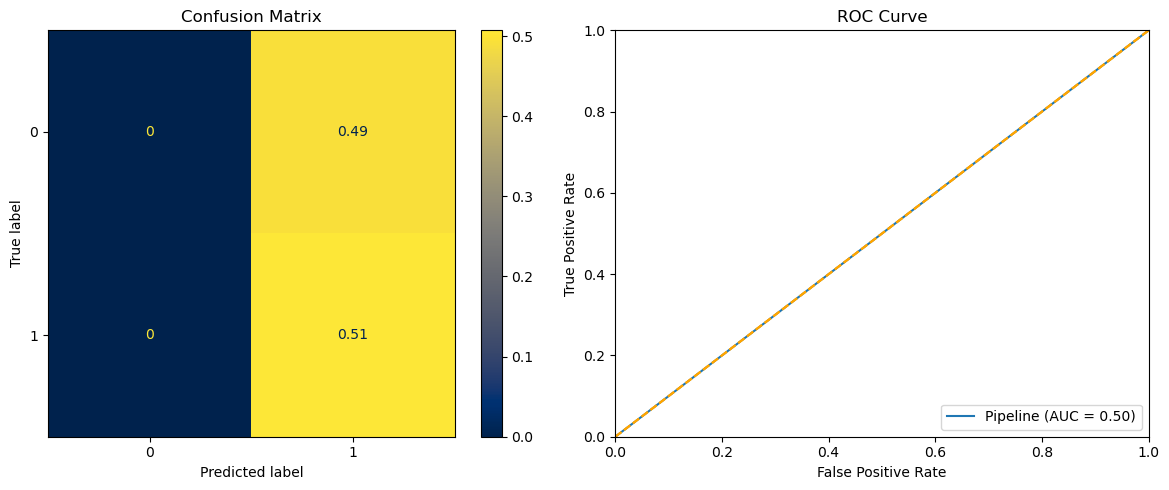

In [5]:
# import Pipeline
from sklearn.pipeline import Pipeline
# import TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# import Dummy Classifier
from sklearn.dummy import DummyClassifier

dummy_clf_pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('dummy_clf_pipe', DummyClassifier(random_state=42))])

dummy_clf_pipe.fit(X_train, y_train)
y_pred = dummy_clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, dummy_clf_pipe)

**The dummy classifier is correctly guessing 51% of the tweets as "Positive". This suggests that there is a class imbalance with the data that we have with mostly "Positive" tweets.**

In [6]:
df_binary['sentiment'].value_counts(normalize=True)

sentiment
1    0.505467
0    0.494533
Name: proportion, dtype: float64

**We can see that we indeed have a slight class imbalance problem. To address this we can randomly oversample our tweets. Since we will most likely be using this technique in our actual models too we should create a dummy classifier that has the oversampled data as well to serve as a baseline.**

#### <b>4.1.3.1 <span style='color:#F1A424'>|</span> Random Oversampled Dummy Model</b>

Training Score: 0.49             Test Score:0.49


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1262
           1       0.00      0.00      0.00      1299

    accuracy                           0.49      2561
   macro avg       0.25      0.50      0.33      2561
weighted avg       0.24      0.49      0.33      2561



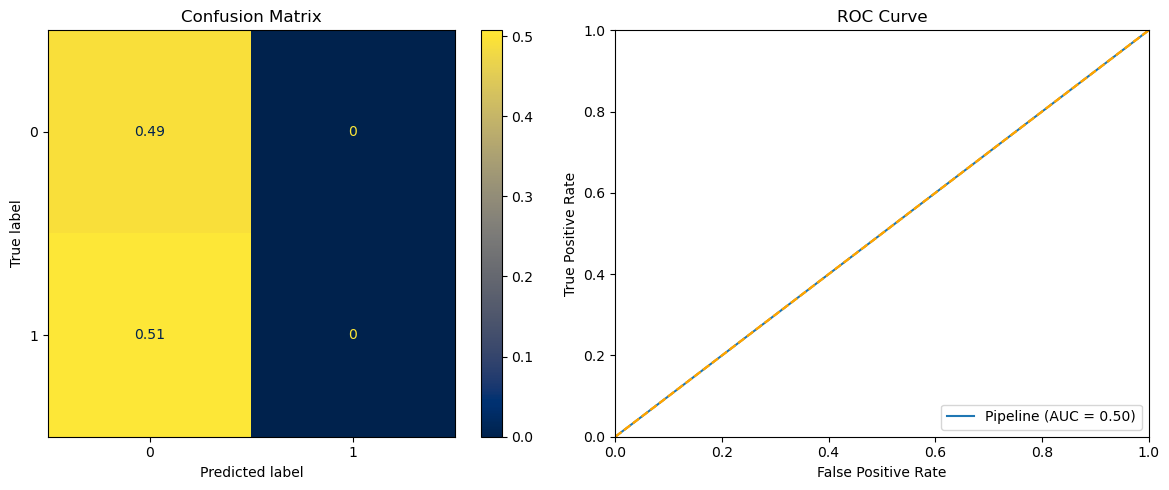

In [7]:
# import imblearn
import imblearn

from imblearn.over_sampling import RandomOverSampler
import imblearn.pipeline

dummy_clf_pipe = imblearn.pipeline.Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('dummy_clf_pipe', DummyClassifier(random_state=42))
])
dummy_clf_pipe.fit(X_train, y_train)
y_pred = dummy_clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, dummy_clf_pipe)

### <b>4.1.4 <span style='color:#F1A424'>|</span> Vanilla Logistic Regression Model</b>

Training Score: 0.95             Test Score:0.87


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1262
           1       0.86      0.88      0.87      1299

    accuracy                           0.87      2561
   macro avg       0.87      0.87      0.87      2561
weighted avg       0.87      0.87      0.87      2561



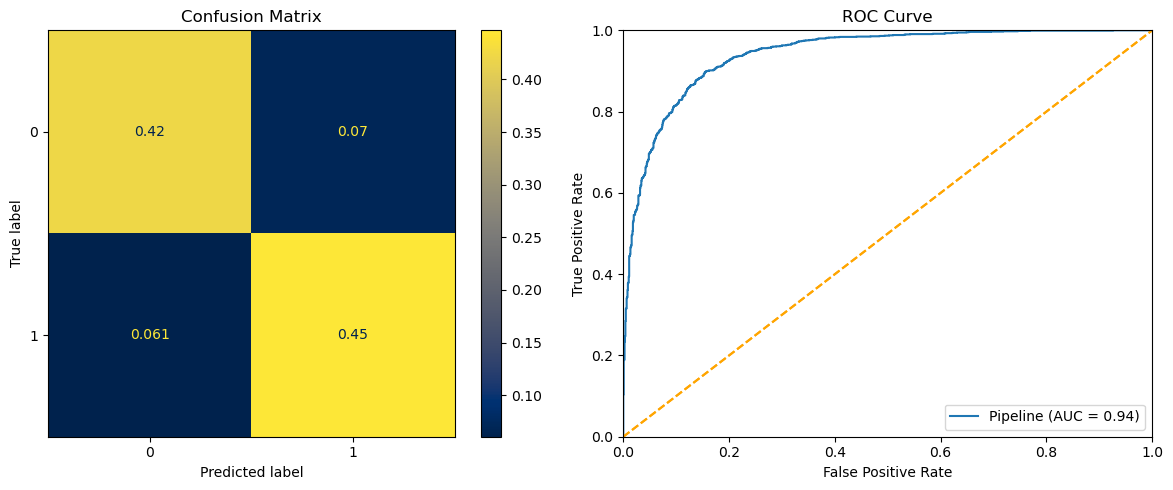

In [8]:
# logistic regression
log_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('log_clf', LogisticRegression())])

log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
classification(y_test, y_pred, X_test, X_train, log_clf)

#### <b>4.1.4.1 <span style='color:#F1A424'>|</span> Random Oversampled Vanilla Logistic Model</b>

Training Score: 0.95             Test Score:0.87


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1262
           1       0.87      0.88      0.87      1299

    accuracy                           0.87      2561
   macro avg       0.87      0.87      0.87      2561
weighted avg       0.87      0.87      0.87      2561



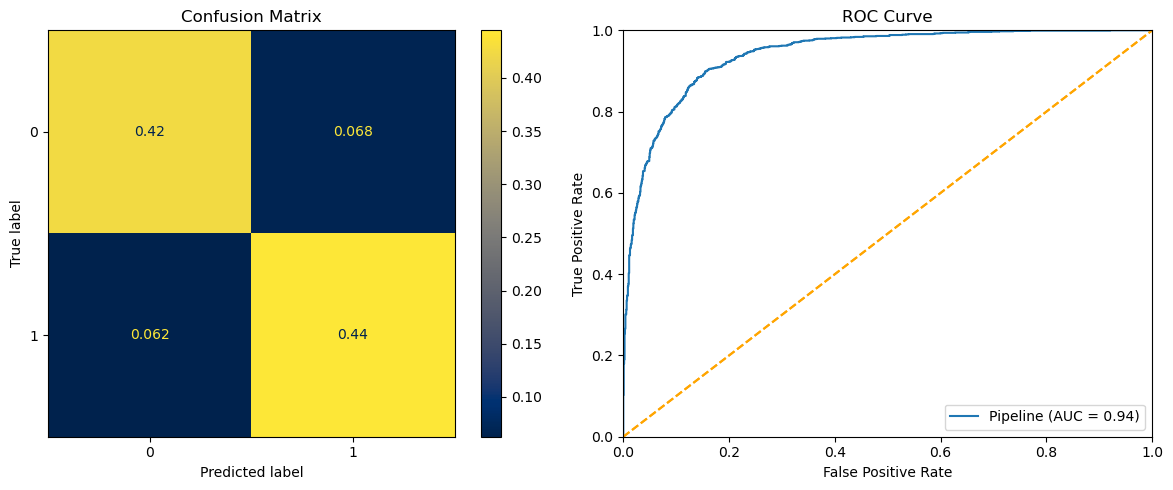

In [9]:
# logistic regression with oversampling
log_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('log_clf', LogisticRegression())
])
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
classification(y_test, y_pred, X_test, X_train, log_clf)

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>|</span></span></b> Iterate</b></p></div>

## <b><span style='color:#F1A424'>|</span> Mulitonomial NB</b>

In [10]:
# Creating the pipeline for multinomial naive bayes
mnb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('mnb_clf', MultinomialNB())])

mnb_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb_clf', MultinomialNB())])

### <b><span style='color:#F1A424'>|</span> MultinomialNB: Model #1</b>

Training Score: 0.93             Test Score:0.81


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1262
           1       0.83      0.79      0.81      1299

    accuracy                           0.81      2561
   macro avg       0.81      0.81      0.81      2561
weighted avg       0.81      0.81      0.81      2561



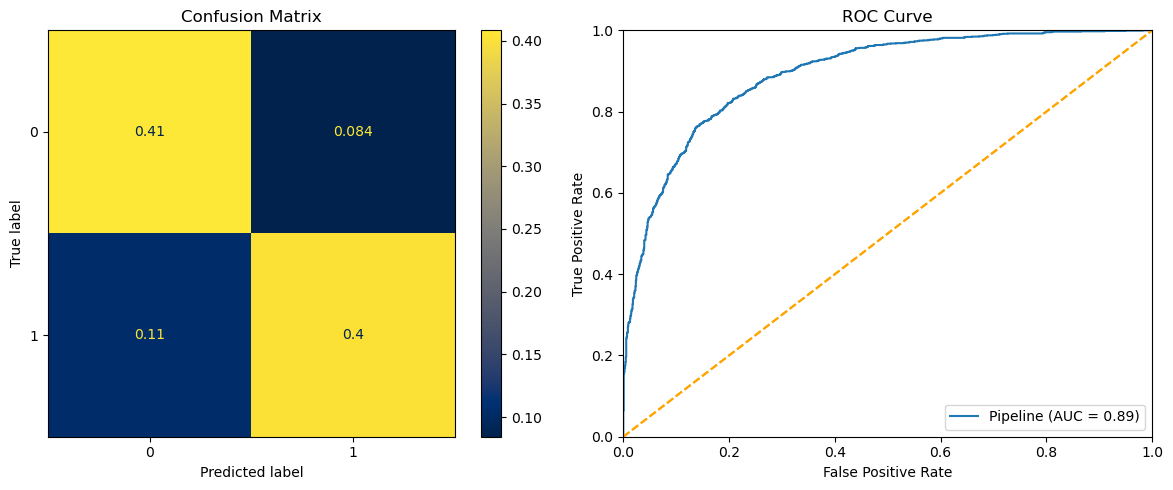

In [11]:
y_pred = mnb_clf.predict(X_test)
classification(y_test, y_pred, X_test, X_train, mnb_clf)

- The model correctly predicted 41% of the tweets as "positive, which is the same as the actual label. 

- The model incorrectly predicted 8.4% of the tweets as "positive", while the actual label was 0 ("negative"). 

- The model incorrectly predicted 11% of the tweets as "negative", while the actual label was 1 ("positive"). 

- The model correctly predicted 40% of the tweets as "positive", which is the same as the actual label 1 ("positive").

- The area under the curve (AUC) is a measure of how well the model can distinguish between the two classes. The higher the AUC, the better the model. The AUC is 0.89, which indicates a good performance.

In [12]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

run_gridsearches = False


if run_gridsearches == True:
    param_grid = {
    'mnb_clf__alpha': [0.001, 0.01, 0.1, 1],
    'mnb_clf__fit_prior': [True, False]
}
    grid_search = GridSearchCV(mnb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='recall_macro')
    grid_search.fit(X_train, y_train)
    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_
else:
    best_params = {'clf__alpha': 0.01, 'vectorizer__stop_words': 'stop_lst'}
    print(best_params)

{'clf__alpha': 0.01, 'vectorizer__stop_words': 'stop_lst'}


**Let's try these parameters in a new model.**

### <b><span style='color:#F1A424'>|</span> Tuned MultinomialNB: Model #1</b>

Training Score: 0.96             Test Score:0.73


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1262
           1       0.75      0.71      0.73      1299

    accuracy                           0.73      2561
   macro avg       0.73      0.73      0.73      2561
weighted avg       0.73      0.73      0.73      2561



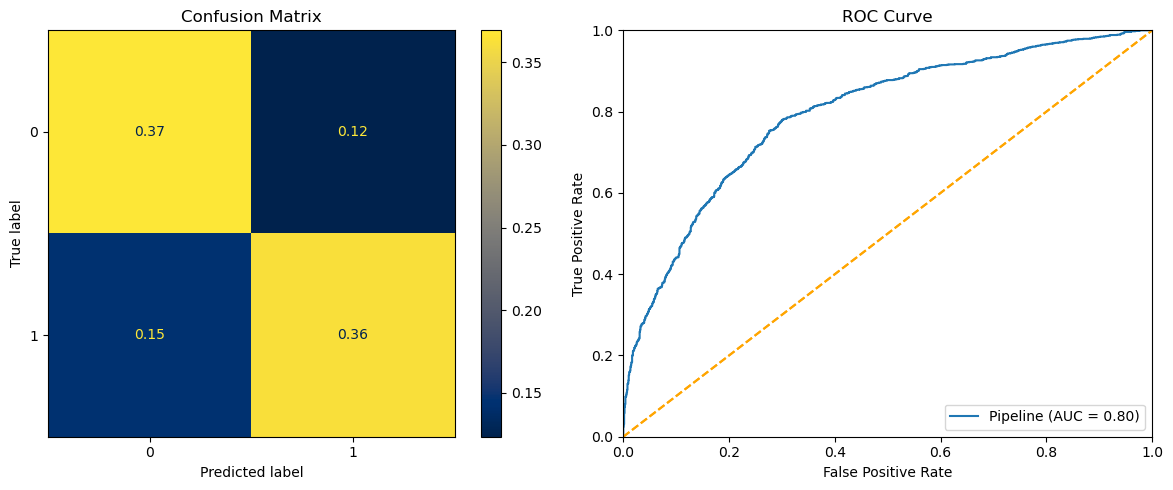

In [13]:
# Creating the pipeline for multinomial naive bayes with tuned parameters
mnb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('mnb_clf', MultinomialNB(alpha=0.01, fit_prior=True))])

mnb_clf.fit(X_train, y_train)

y_pred = mnb_clf.predict(X_test)
classification(y_test, y_pred, X_test, X_train, mnb_clf)

**The results are still not ideal since the performance of the model for both True Negative and True positive values is still fairly low and the model seems to be overfitting to the training data. We can try Random Over Sampling to address the imbalance between positive and negative tweets and see if it helps.**

### <b><span style='color:#F1A424'>|</span> Random Oversampled MultinomialNB: Model #2</b>

Training Score: 0.95             Test Score:0.77


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.80      0.78      1262
           1       0.79      0.74      0.77      1299

    accuracy                           0.77      2561
   macro avg       0.77      0.77      0.77      2561
weighted avg       0.77      0.77      0.77      2561



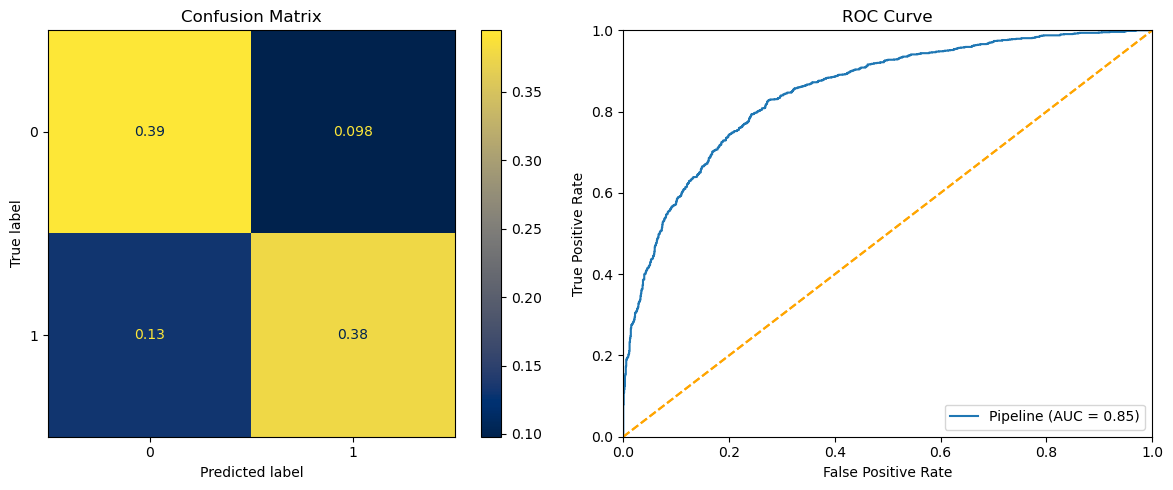

In [14]:
# perform random oversampling on mulitnomial naive bayes
mnb_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('mnb_clf', MultinomialNB(alpha=0.1))
])
mnb_clf.fit(X_train, y_train)
y_pred = mnb_clf.predict(X_test)
classification(y_test, y_pred, X_test, X_train, mnb_clf)

**The model's performance on correctly identifying positive and negative tweets has remained the same,even though it has been oversampled. Unfortunately the model is overfitting to the training data so we can try to tune this oversampled model.**

In [15]:
# Tuning Random Oversampled MNB Model #3
from sklearn.model_selection import GridSearchCV

run_gridsearches = False


if run_gridsearches == True:
    param_grid = {
    'mnb_clf__alpha': [0.001, 0.01, 0.1, 1],
    'mnb_clf__fit_prior': [True, False]
}
    grid_search = GridSearchCV(mnb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='recall_macro')
    grid_search.fit(X_train, y_train)
    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_
else:
    best_params = {'clf__alpha': 0.01, 'vectorizer__stop_words': 'stop_lst'}
    print(best_params)



{'clf__alpha': 0.01, 'vectorizer__stop_words': 'stop_lst'}


### <b><span style='color:#F1A424'>|</span> Tuned Random Oversampled MultinomialNB: Model #3</b>

Training Score: 0.96             Test Score:0.73


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1262
           1       0.75      0.71      0.73      1299

    accuracy                           0.73      2561
   macro avg       0.73      0.73      0.73      2561
weighted avg       0.73      0.73      0.73      2561



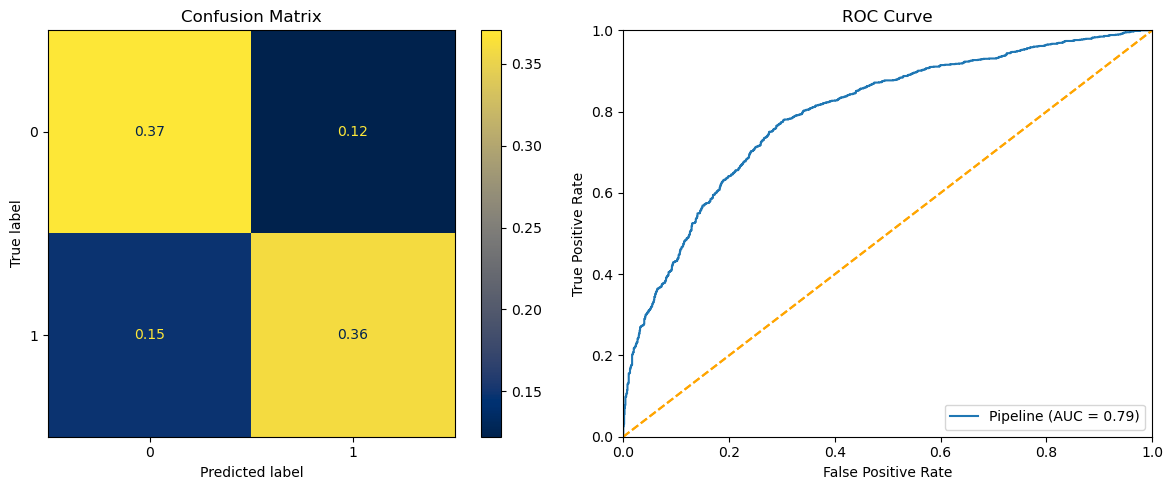

In [16]:
# Tuned Random Oversampled MNB Model #3

mnb_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('mnb_clf', MultinomialNB(alpha=0.01, fit_prior=True))
])
mnb_clf.fit(X_train, y_train)
y_pred = mnb_clf.predict(X_test)
classification(y_test, y_pred, X_test, X_train, mnb_clf)

**With the tuned parameters, the model's performance in identifying negative and psotive tweets has has not had any impact. The best model among the MNB models was the untuned multinomial with a recall macro average score of 0.81.**

**Now that we have tried several options for the Multinomial Naive Bayes model, we can try and evaluate a more complex model such as the Random Forest Classifier.**

## <b><span style='color:#F1A424'>|</span> RandomForest Classifier</b>

### <b><span style='color:#F1A424'>|</span> RandomForest: Model #1</b>
**Since Random Forest has a class_weight parameter that we can specify to try to address the class imbalance issue without having to oversample, we will try this option in our base model.**

In [17]:
# random forest with class_weight='balanced
rf_clf = Pipeline([('tfidf', TfidfVectorizer()),
                   ('rf_clf', RandomForestClassifier(class_weight='balanced', random_state=42))
                  ])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf_clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Training Score: 1.0             Test Score:0.85


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1262
           1       0.85      0.86      0.86      1299

    accuracy                           0.85      2561
   macro avg       0.85      0.85      0.85      2561
weighted avg       0.85      0.85      0.85      2561



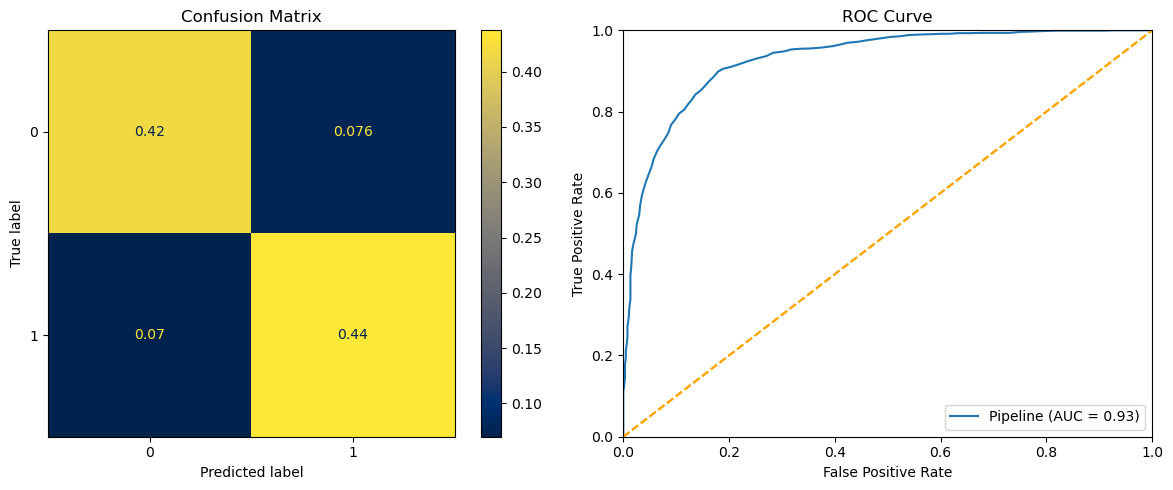

In [18]:
# Predicting the Test set results
y_pred = rf_clf.predict(X_test)
classification(y_test, y_pred, X_test, X_train, rf_clf)

**We can see that the Random Forest model is performing slightly similar to the initial Multinomial Naive Bayes model with a marginal improvement. Additionally, based on the training and test scores, it seems like the model is overfit.**

In [19]:
# Hyperparameter Tuning with GridSearchCV

if run_gridsearches == True:
    param_grid = {'clf__criterion': ['gini', 'entropy'], 
            'clf__max_depth': [10, 20, None],
            'clf__min_samples_leaf': [1, 2, 3]
           }

    gridsearch = GridSearchCV(estimator=rf_clf, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_
else:
    best_params={'clf__criterion': 'gini', 'clf__max_depth': 10, 
                 'clf__min_samples_leaf': 3}
    print(best_params)

{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 3}


**Now that we have the best parameters for optimizing the recall macro score, we can go ahead and see how the model performs with these.**

### <b><span style='color:#F1A424'>|</span> Tuned RandomForest: Model #1</b>

In [20]:
rf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                    ('rf_clf', RandomForestClassifier(class_weight='balanced', 
                                                     criterion='gini', 
                                                     max_depth=10, 
                                                     min_samples_leaf=3,
                                                     random_state=42))])

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf_clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=3, random_state=42))])

Training Score: 0.83             Test Score:0.81


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1262
           1       0.78      0.86      0.82      1299

    accuracy                           0.81      2561
   macro avg       0.81      0.81      0.80      2561
weighted avg       0.81      0.81      0.81      2561



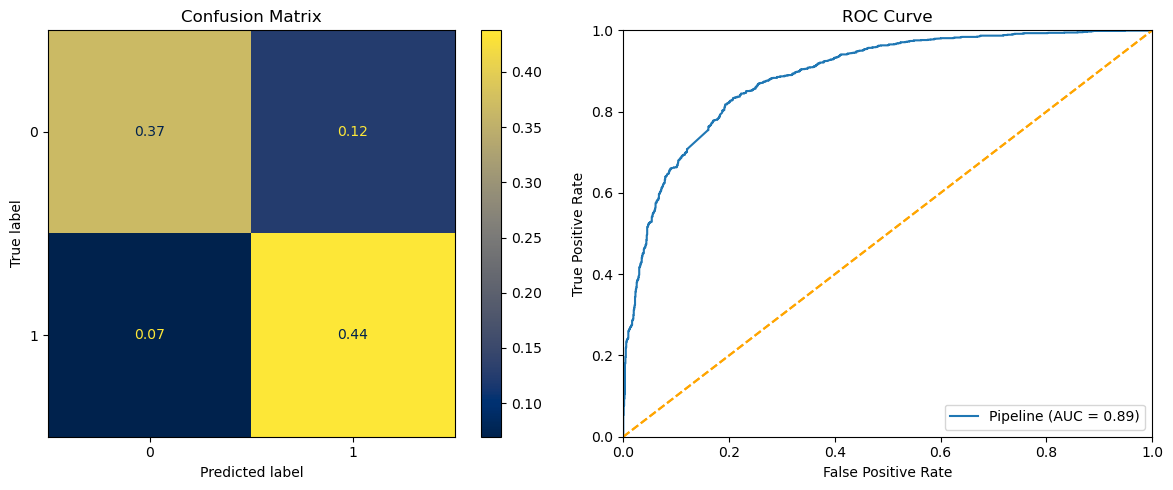

In [21]:
# Predicting the Test set results
y_pred = rf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, rf_pipe)

**After tuning the model, we can see that the model performance dropped in correctly identifying positive and negative tweets compared to the baseline model. We can once again try to oversample the data and see if the performance of our model improves.**

### <b><span style='color:#F1A424'>|</span> Random Over Sampled RandomForest: Model #2</b>

In [22]:
rf_pipe = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf', RandomForestClassifier(class_weight='balanced', 
                                      criterion='entropy', 
                                      max_depth=None, 
                                      min_samples_leaf=2,
                                      random_state=42))
])

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('os', RandomOverSampler(random_state=42)),
                ('rf_clf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', min_samples_leaf=2,
                                        random_state=42))])

Training Score: 0.97             Test Score:0.87


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1262
           1       0.86      0.89      0.87      1299

    accuracy                           0.87      2561
   macro avg       0.87      0.87      0.87      2561
weighted avg       0.87      0.87      0.87      2561



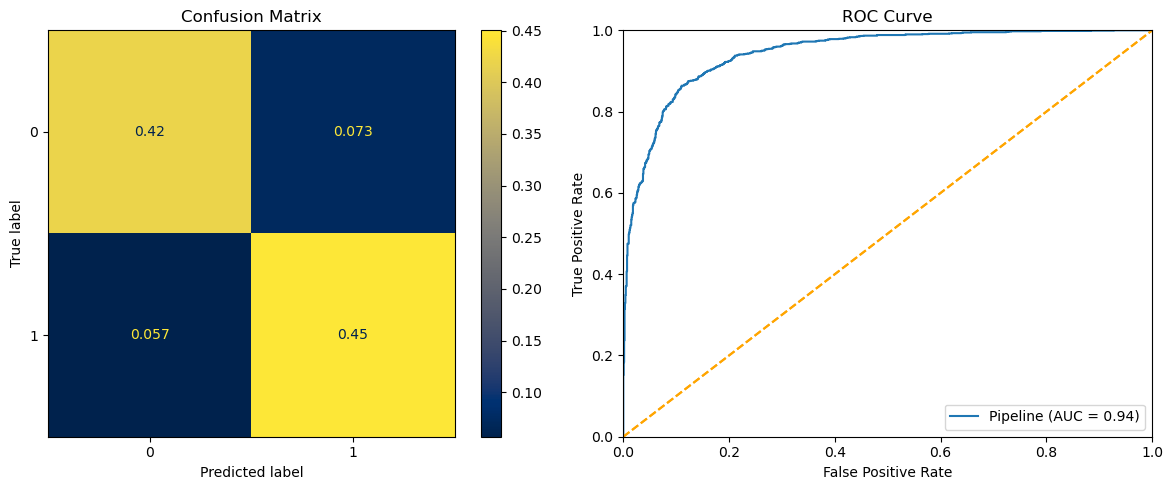

In [23]:
# Predicting the Test set results
y_pred = rf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, rf_pipe)

**Compared to the first model we created, the model's performance has improved very slightly in correctly identifying positive and negative tweets. However, the model is still overfitting to the training data.**

### <b><span style='color:#F1A424'>|</span> Tuned Random Over Sampled RandomForest: Model #3</b>

In [24]:
if run_gridsearches == True:
    param_grid = {'clf__criterion': ['gini', 'entropy'], 
            'clf__max_depth': [10, 20, None],
            'clf__min_samples_leaf': [1, 2, 3],
            'vectorizer__norm': ['l1', 'l2']
            }

    gridsearch = GridSearchCV(estimator=rf_pipe, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_
else:
    best_params={'clf__criterion': 'gini', 'clf__max_depth': 20, 
                 'clf__min_samples_leaf': 1, 'vectorizer__norm': 'l2'}
    print(best_params)

{'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'vectorizer__norm': 'l2'}


In [25]:
rf_pipe = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer(norm='l2')),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf', RandomForestClassifier(class_weight='balanced', 
                                      criterion='gini', 
                                      max_depth=20, 
                                      min_samples_leaf=1,
                                      random_state=42))
])

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('os', RandomOverSampler(random_state=42)),
                ('rf_clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        random_state=42))])

Training Score: 0.9             Test Score:0.82


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1262
           1       0.80      0.85      0.82      1299

    accuracy                           0.82      2561
   macro avg       0.82      0.81      0.81      2561
weighted avg       0.82      0.82      0.81      2561



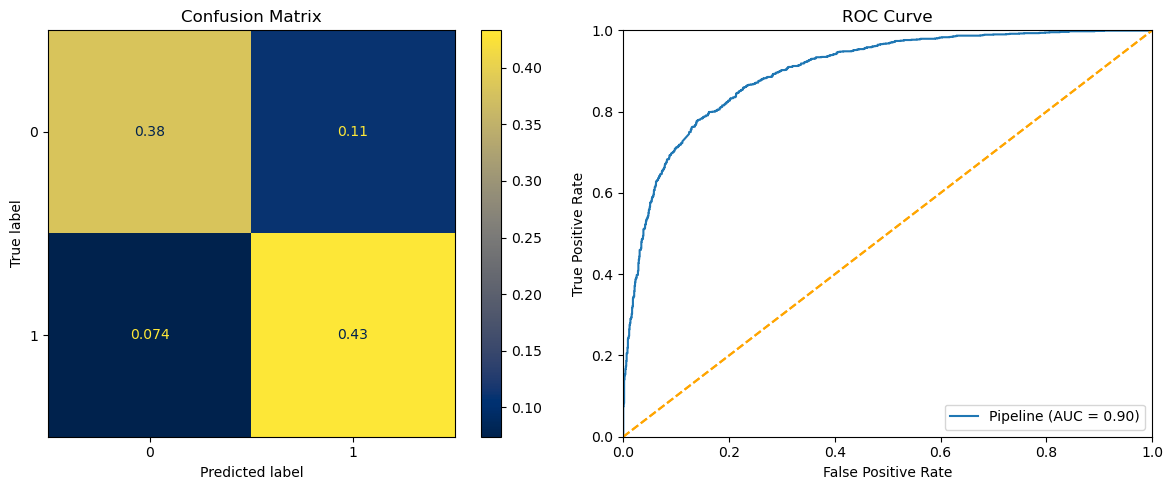

In [26]:
# predict the test set results
y_pred = rf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, rf_pipe)

**The best model among the Random Forest models was the Oversampled Random Forest with a recall macro average score of 0.87.**

## <b><span style='color:#F1A424'>|</span> Logistic Regression</b>
**Similar to the Random Forest models, Logistic Regression takes in an optional class_weight argument. Since we know that we have a class imbalance, we will once again try the model with class_weight='balanced' to begin with.**

### <b><span style='color:#F1A424'>|</span> LogisticRegression: Model #1</b>

In [27]:
log_clf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                        ('log_clf_pipe', LogisticRegression(class_weight='balanced', random_state=42,))])

log_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log_clf_pipe',
                 LogisticRegression(class_weight='balanced', random_state=42))])

Training Score: 0.95             Test Score:0.87


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1262
           1       0.87      0.88      0.87      1299

    accuracy                           0.87      2561
   macro avg       0.87      0.87      0.87      2561
weighted avg       0.87      0.87      0.87      2561



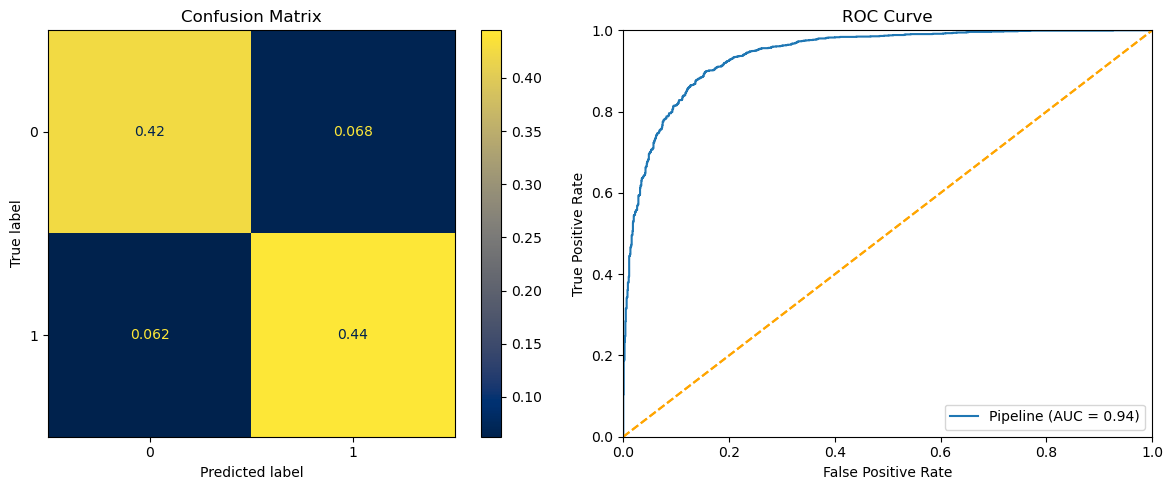

In [28]:
# predict the test set results
y_pred = log_clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, log_clf_pipe)

### <b><span style='color:#F1A424'>|</span> Tuned Logistic Regression: Model #2</b>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Score: 1.0             Test Score:0.92


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1262
           1       0.91      0.94      0.93      1299

    accuracy                           0.92      2561
   macro avg       0.92      0.92      0.92      2561
weighted avg       0.92      0.92      0.92      2561



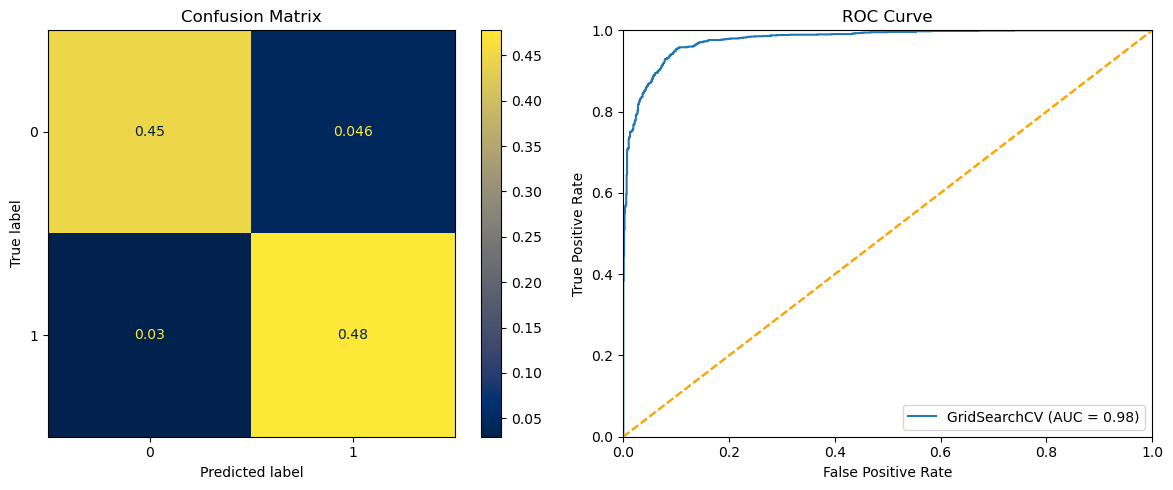

In [29]:
# logistic regression with oversampling and hyperparameter tuning
from sklearn.model_selection import GridSearchCV

log_clf = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('log_clf', LogisticRegression())
])
param_grid = {
    'log_clf__C': [0.01, 0.1, 1, 10, 100],
    'log_clf__penalty': ['l1', 'l2'],
    'log_clf__solver': ['liblinear']
}
grid_search = GridSearchCV(log_clf, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
classification(y_test, y_pred, X_test, X_train, grid_search)



**This model is by far the best model we have seen so far. The model is still overfitting to the training data however the recall macro average score is 0.892.**

## <b>4.2 <span style='color:#F1A424'>|</span> Multiclass Classification</b>

**Now that we have looked at this as a binary classification problem, it's time to mix in the "Neutral" sentiment and try out a couple types of models to see how the performance changes.**

In [30]:
#verifying that we have all three emotions in the original df
df['sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [31]:
#mapping emotion column to numerical values
emotion_dict = {'Negative': 0, 'Neutral':1, 'Positive': 2}
df['sentiment'] = df['sentiment'].map(emotion_dict)
df['sentiment'].value_counts()

sentiment
1    8561
2    6472
0    6332
Name: count, dtype: int64

In [33]:
y= df['sentiment']
X= df['lemma_preprocessed_tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
y_train.value_counts(normalize=True)

sentiment
1    0.401173
2    0.304500
0    0.294327
Name: proportion, dtype: float64

In [46]:
#modifying "classification()" function for multiclass classification

def multiclass_eval(y_true, y_pred, X_test, X_train, clf, n_class=3):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of 
    model quality for multiclass models.
    
    y_true: Correct y values, typically y_test that comes from the 
    train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X_test: X_test values from train_test_split
    X_train: X_train values from train_test_split"""
    
    #training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    #Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))

    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

    #Plotting the normalized confusion matrix
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)/len(y_true)).plot(ax=ax[0], cmap="Greens")
    ax[0].set_title("Confusion Matrix")
    ax[0].grid(False)

    pred_prob = clf.predict_proba(X_test)
    
    #Plotting the ROC curve
    fpr={}
    tpr={}
    thresh={}
    
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:,i], pos_label=i)
    
    ax[1].plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative vs Rest')
    ax[1].plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Neutral vs Rest')
    ax[1].plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive vs Rest')
    ax[1].set_title('Multiclass ROC curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive rate')
    ax[1].legend(loc='best')
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

### <b>4.2.1 <span style='color:#F1A424'>|</span> Vanilla Dummy Model</b>

**We need to re-establish our baseline models for the multiclass problem at hand. We will once again be creating a model with the raw data as well as another one with the random oversampled data to fit the data being fed into each model.**

In [47]:
dummy_clf_pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                        ('dummy_clf_pipe', DummyClassifier(random_state=42))])

dummy_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('dummy_clf_pipe', DummyClassifier(random_state=42))])

Training Score: 0.4             Test Score:0.4


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1616
           1       0.40      1.00      0.57      2133
           2       0.00      0.00      0.00      1593

    accuracy                           0.40      5342
   macro avg       0.13      0.33      0.19      5342
weighted avg       0.16      0.40      0.23      5342



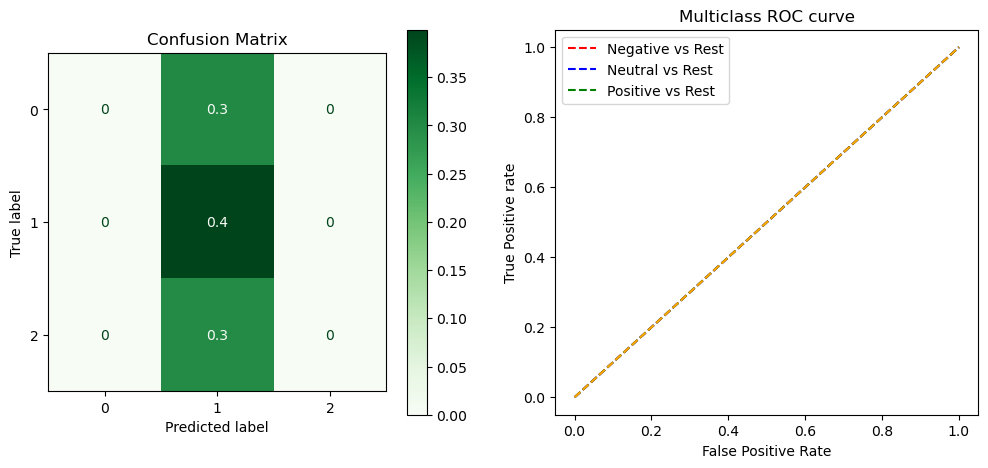

In [48]:
# Predicting the Test set results
y_pred = dummy_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, dummy_clf_pipe)

In [49]:
dummy_clf_pipe = imblearn.pipeline.Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('clf', DummyClassifier())
])
dummy_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('os', RandomOverSampler(random_state=42)),
                ('clf', DummyClassifier())])

Training Score: 0.29             Test Score:0.3


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.30      1.00      0.46      1616
           1       0.00      0.00      0.00      2133
           2       0.00      0.00      0.00      1593

    accuracy                           0.30      5342
   macro avg       0.10      0.33      0.15      5342
weighted avg       0.09      0.30      0.14      5342



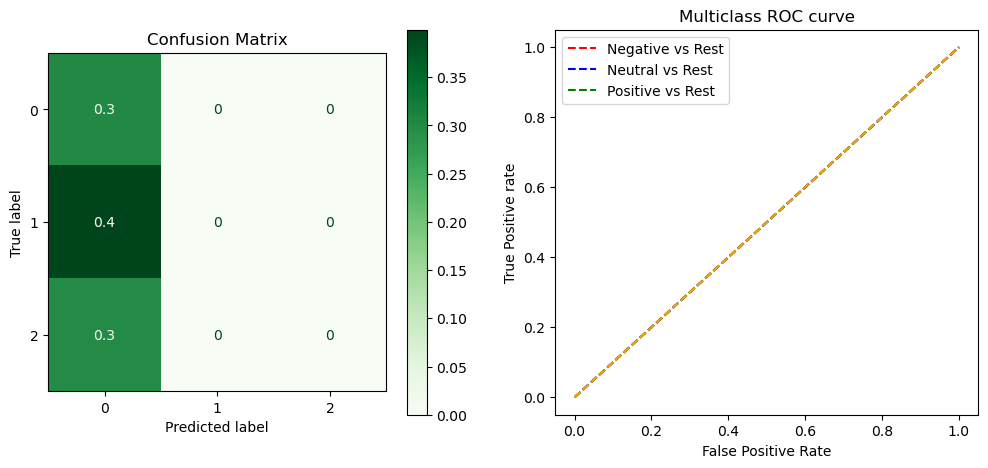

In [50]:
# Predicting the Test set results
y_pred = dummy_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, dummy_clf_pipe)

## <b><span style='color:#F1A424'>|</span> Random Forest</b>

### <b><span style='color:#F1A424'>|</span> RandomForest: Model #1</b>

Training Score: 1.0             Test Score:0.81


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1616
           1       0.77      0.94      0.85      2133
           2       0.84      0.71      0.77      1593

    accuracy                           0.81      5342
   macro avg       0.82      0.80      0.80      5342
weighted avg       0.82      0.81      0.81      5342



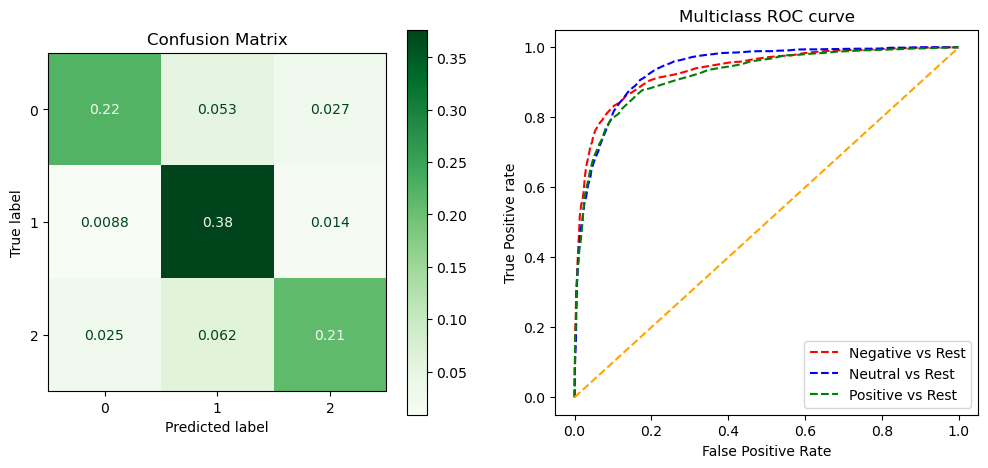

In [56]:
rf_clf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                        ('rf_clf_pipe', RandomForestClassifier(class_weight='balanced', random_state=42))])

rf_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_pipe)

**The model is overfitting to the training data and is not performing that well make predictions on all classes even though they are much better compared to the baseline.**

In [58]:
# Define parameters to tune
param_grid = {
    'rf_clf_pipe__criterion': ['gini', 'entropy'], 
    'rf_clf_pipe__n_estimators': [100, 200, 500],
    'rf_clf_pipe__max_depth': [5, 8, 15, 25],
    'rf_clf_pipe__min_samples_split': [2, 5, 10],
    'rf_clf_pipe__min_samples_leaf': [1,5,8]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_clf_pipe, param_grid=param_grid, cv=5 , n_jobs=-1, verbose=1, scoring='recall_macro')

# Fit Grid Search to training data
grid_search.fit(X_train, y_train)

# Best parameters
print('Best params:', grid_search.best_params_)   

# Best score
print('Best accuracy: ', grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best params: {'rf_clf_pipe__criterion': 'entropy', 'rf_clf_pipe__max_depth': 25, 'rf_clf_pipe__min_samples_leaf': 1, 'rf_clf_pipe__min_samples_split': 10, 'rf_clf_pipe__n_estimators': 500}
Best accuracy:  0.7635785467171726


### <b><span style='color:#F1A424'>|</span> Tuned RandomForest: Model #1</b>

Training Score: 0.86             Test Score:0.76


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1616
           1       0.73      0.86      0.79      2133
           2       0.83      0.66      0.74      1593

    accuracy                           0.76      5342
   macro avg       0.77      0.75      0.76      5342
weighted avg       0.77      0.76      0.76      5342



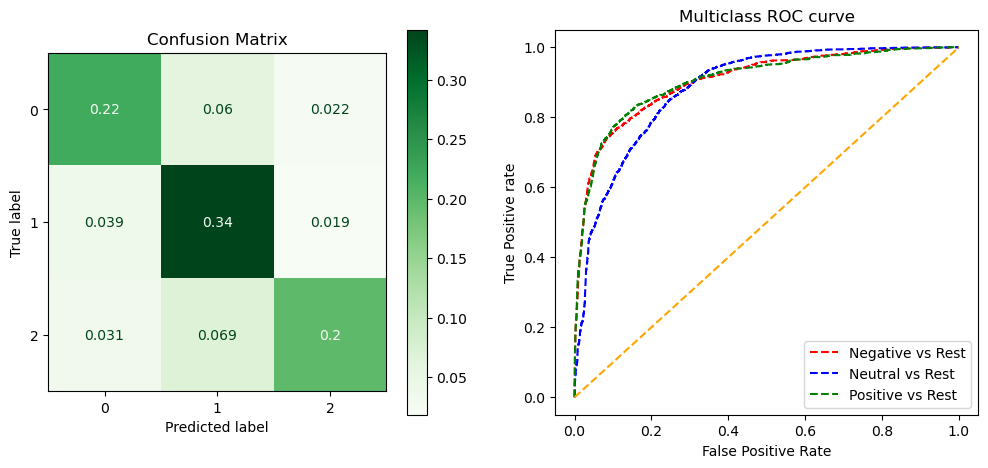

In [59]:
rf_clf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                        ('rf_clf_pipe', RandomForestClassifier(class_weight='balanced', 
                                                               criterion='entropy', 
                                                               max_depth=25, 
                                                               min_samples_leaf=1,
                                                               min_samples_split=10,
                                                               n_estimators=500,
                                                               random_state=42))])

rf_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_pipe)

In [ ]:
emotion_dict = {'Negative': 0, 'Neutral':1, 'Positive': 2}

**The tuned model slightly increased perofromance in making predictions for the "neutral" sentiments from 34% to 38%.There was also a very marginal increase in making predictions for the "positive" class from20% to 21%, however the model is still overfitting to the training data.**

### <b><span style='color:#F1A424'>|</span> Random Oversampled RandomForest: Model #2</b>

Training Score: 1.0             Test Score:0.81


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1616
           1       0.77      0.93      0.84      2133
           2       0.84      0.71      0.77      1593

    accuracy                           0.81      5342
   macro avg       0.82      0.80      0.80      5342
weighted avg       0.81      0.81      0.81      5342



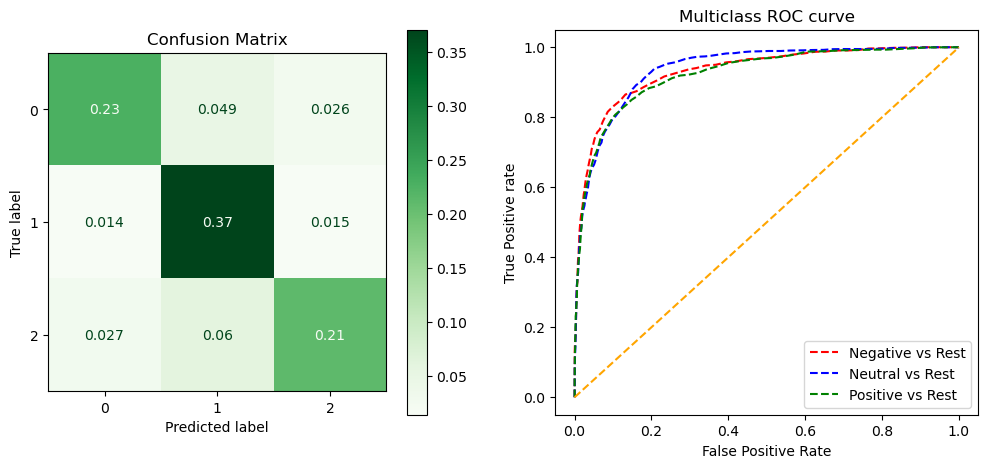

In [62]:
rf_clf_pipe = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf_pipe', RandomForestClassifier(random_state=42))
])

rf_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_pipe)

**Oversampling the data in this case hasn't really helped with the neutral class still being higher relative to the positive and negative classes.**

### <b><span style='color:#F1A424'>|</span> Tuned Random Oversampled RandomForest: Model #2</b>

Training Score: 0.87             Test Score:0.77


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1616
           1       0.73      0.88      0.80      2133
           2       0.82      0.67      0.74      1593

    accuracy                           0.77      5342
   macro avg       0.78      0.75      0.76      5342
weighted avg       0.77      0.77      0.76      5342



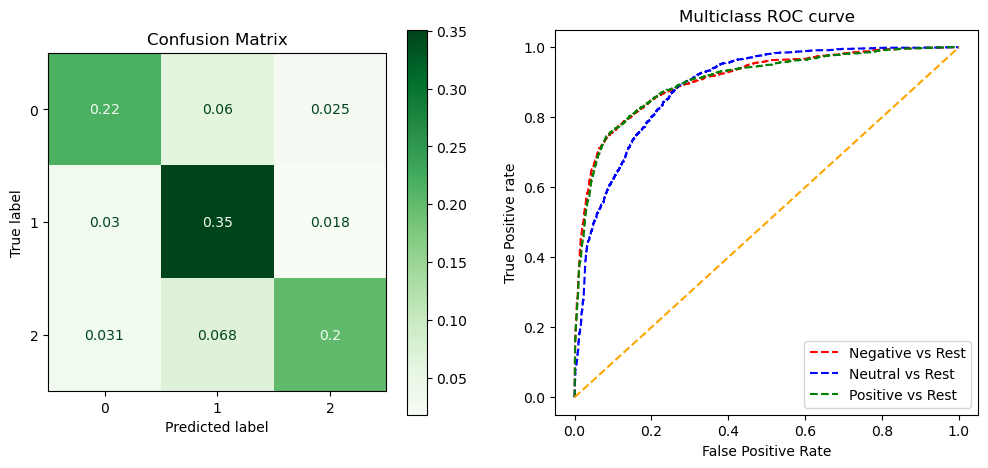

In [64]:
rf_clf_pipe = imblearn.pipeline.Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('os', RandomOverSampler(random_state=42)),
    ('rf_clf_pipe', RandomForestClassifier(class_weight='balanced', 
                                           criterion='entropy', 
                                           max_depth=25, 
                                           min_samples_leaf=1,
                                           min_samples_split=10,
                                           n_estimators=500,
                                           random_state=42))
])

rf_clf_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, rf_clf_pipe)

**The models that seem to have performed well out of all Random forest models are the untuned Random Forest model without the oversampled data and untuned Random Forest model with the oversampled data with almost identical recall macro-avergae score of 0.81. The models are however overfitting**

## <div style="color:white;display:fill;border-radius:8px;background-color:#323232;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>6 |</span></span></b> Evaluate</b></p></div>

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.73      0.80      1324
     Neutral       0.78      0.94      0.86      1746
    Positive       0.85      0.76      0.80      1203

    accuracy                           0.83      4273
   macro avg       0.84      0.81      0.82      4273
weighted avg       0.83      0.83      0.82      4273



In [ ]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.77      0.83      1324
     Neutral       0.82      0.98      0.89      1746
    Positive       0.88      0.75      0.81      1203

    accuracy                           0.85      4273
   macro avg       0.86      0.84      0.84      4273
weighted avg       0.86      0.85      0.85      4273



In [ ]:
print(classification_report(y_test, multiNB_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.67      0.72      1324
     Neutral       0.74      0.85      0.79      1746
    Positive       0.72      0.69      0.71      1203

    accuracy                           0.75      4273
   macro avg       0.75      0.74      0.74      4273
weighted avg       0.75      0.75      0.75      4273



In [ ]:
# Confusin matrix for the logistic regression model
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 970,  247,  107],
       [  38, 1649,   59],
       [  82,  208,  913]], dtype=int64)

In [ ]:
# Confusin matrix for the random forest model
cm = confusion_matrix(y_test, rf_y_pred)
cm

array([[1026,  186,  112],
       [  22, 1710,   14],
       [ 102,  193,  908]], dtype=int64)

In [ ]:
# Confusin matrix for the multinomial naive bayes model
cm = confusion_matrix(y_test, multiNB_pred)
cm

array([[ 885,  270,  169],
       [ 111, 1481,  154],
       [ 128,  243,  832]], dtype=int64)

In [ ]:
rf_clf.predict(['Wow! This is an amazing initiative.'])

array(['Positive'], dtype=object)

In [ ]:
rf_clf.predict(['this really sucks!'])

array(['Neutral'], dtype=object)

In [ ]:
rf_clf.predict(['The judicial system in Kenya is really corrupt'])

array(['Negative'], dtype=object)

In [ ]:
rf_clf.predict(['Kenyans are livid and angry at the current state of the economy'])

array(['Negative'], dtype=object)

In [ ]:
rf_clf.predict(['The customer service is really great'])

array(['Positive'], dtype=object)